In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# load dataset
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
type(data)

sklearn.utils.Bunch

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
X, Y = data.data, data.target

In [7]:
X.shape

(569, 30)

In [8]:
Y.shape

(569,)

In [9]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [10]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [11]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
model = nn.Linear(30,1)

In [15]:
# loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [16]:
# convert data into torch tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1,1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1,1))

In [17]:
# train the model
n_epochs = 1000

# stuff to store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)
train_accuracy = np.zeros(n_epochs)
test_accuracy = np.zeros(n_epochs)

for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # forward paa
  outputs = model(X_train)
  loss = criterion(outputs, y_train)
  
  # Train accuracy
  p_train = model(X_train)
  p_train = (p_train.detach().numpy() > 0)
  train_accuracy[it] = np.mean(y_train.numpy() == p_train)

  # backward and optimize
  loss.backward()
  optimizer.step()

  # Get test loss
  ouputs_test = model(X_test)
  loss_test = criterion(ouputs_test, y_test)
  
  # Test accuracy
  p_test = model(X_test)
  p_test = (p_test.detach().numpy() > 0)
  test_accuracy[it] = np.mean(y_test.numpy() == p_test)

  # save losses
  train_losses[it] = loss.item()
  test_losses[it] = loss_test.item()

  if (it + 1) % 50 == 0:
    print(f"Epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}")

Epoch 50/1000, Train Loss: 0.3541, Test Loss: 0.3445
Epoch 100/1000, Train Loss: 0.2731, Test Loss: 0.2664
Epoch 150/1000, Train Loss: 0.2274, Test Loss: 0.2217
Epoch 200/1000, Train Loss: 0.1980, Test Loss: 0.1922
Epoch 250/1000, Train Loss: 0.1774, Test Loss: 0.1711
Epoch 300/1000, Train Loss: 0.1621, Test Loss: 0.1551
Epoch 350/1000, Train Loss: 0.1502, Test Loss: 0.1426
Epoch 400/1000, Train Loss: 0.1407, Test Loss: 0.1325
Epoch 450/1000, Train Loss: 0.1329, Test Loss: 0.1241
Epoch 500/1000, Train Loss: 0.1264, Test Loss: 0.1171
Epoch 550/1000, Train Loss: 0.1209, Test Loss: 0.1112
Epoch 600/1000, Train Loss: 0.1161, Test Loss: 0.1060
Epoch 650/1000, Train Loss: 0.1119, Test Loss: 0.1015
Epoch 700/1000, Train Loss: 0.1082, Test Loss: 0.0976
Epoch 750/1000, Train Loss: 0.1049, Test Loss: 0.0941
Epoch 800/1000, Train Loss: 0.1020, Test Loss: 0.0911
Epoch 850/1000, Train Loss: 0.0993, Test Loss: 0.0883
Epoch 900/1000, Train Loss: 0.0968, Test Loss: 0.0858
Epoch 950/1000, Train Loss: 0

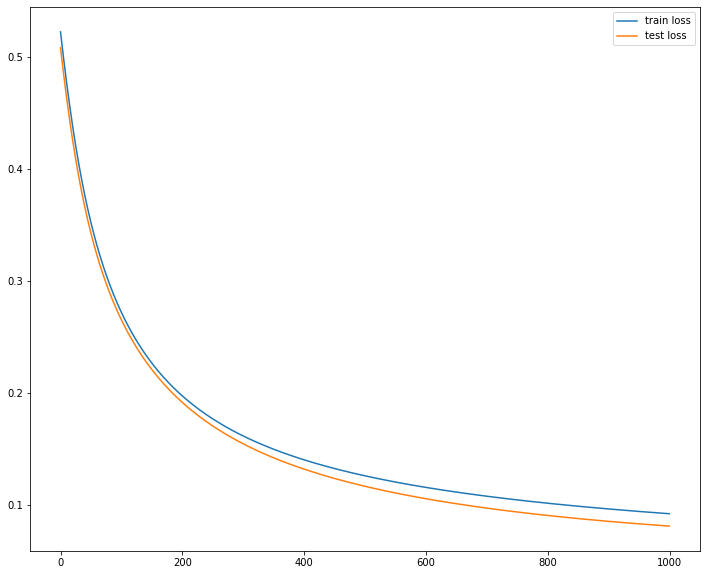

In [18]:
# Plot the train loss and test loss per iteration
plt.figure(figsize=(12,10))
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [19]:
# Get accuracy
with torch.no_grad():
  p_train = model(X_train)
  p_train = (p_train.numpy() > 0)
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model(X_test)
  p_test = (p_test.numpy() > 0)
  test_acc = np.mean(y_test.numpy() == p_test)

print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9843, Test acc: 0.9894


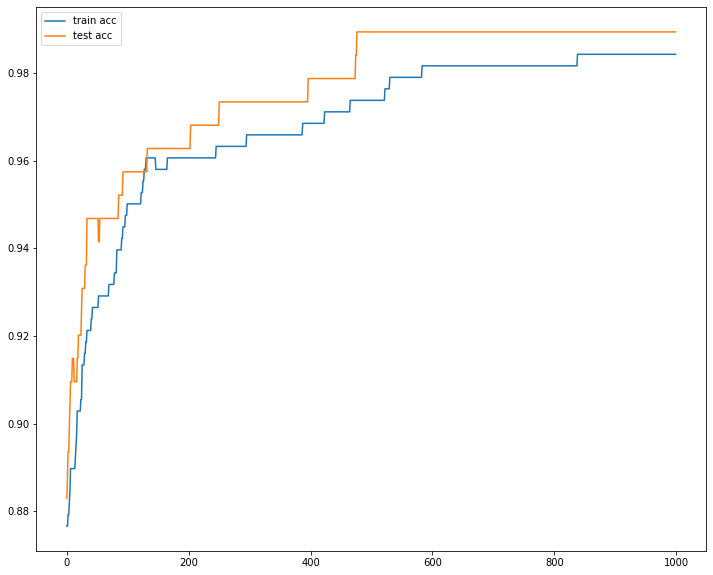

In [20]:
# Plot of accuracy per iteration
plt.figure(figsize=(12,10))
plt.plot(train_accuracy, label='train acc')
plt.plot(test_accuracy, label='test acc')
plt.legend()
plt.show()

In [21]:
# Look at the state dict
model.state_dict()

OrderedDict([('weight',
              tensor([[-0.4660, -0.5883, -0.4340, -0.4694, -0.2772, -0.1679, -0.2725, -0.3049,
                       -0.1964,  0.5049, -0.2577,  0.0107, -0.3712, -0.5406, -0.0681,  0.3639,
                       -0.1627, -0.4429,  0.2909,  0.6379, -0.5220, -0.4698, -0.4516, -0.2406,
                       -0.3644, -0.3372, -0.3179, -0.1813, -0.4671, -0.4341]])),
             ('bias', tensor([0.5371]))])

In [22]:
# Save the model
torch.save(model.state_dict(), 'mymodel.pt')

In [23]:
!ls

mymodel.pt  sample_data


In [24]:
# Load the model
# Note: this makes more sense and is more compact when
# your model is a big class, as we will be seeing later.
model2 = nn.Linear(30,1)
model2.load_state_dict(torch.load('mymodel.pt'))

<All keys matched successfully>

In [25]:
# Evaluate the new model
# Results should be the same
with torch.no_grad():
  p_train = model2(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model2(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)

print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.0735, Test acc: 0.0426


In [26]:
# Download the model
from google.colab import files
files.download('mymodel.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>